In [2]:
# Importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the train dataset to pandas dataframe
train_set = pd.read_csv(r'C:\Users\sasi\Downloads\house-prices-advanced-regression-techniques\train.csv',encoding = 'utf-8')

In [4]:
# Displaying the first five rows using .head() method
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Checking the shape of the train dataset
train_set.shape

(1460, 81)

In [7]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Displaying the statistical values of the train dataset
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Loading the test dataset
est_set = pd.read_csv(r'C:\Users\sasi\Downloads\house-prices-advanced-regression-techniques\test.csv',encoding = 'utf-8')

In [10]:
# Displaying the shape of the test dataset
test_set.shape

(1459, 80)

In [11]:
# Concatenating the train and test dataset
overall_set = pd.concat([train_set,test_set])

C:\Users\sasi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [ ]:
# Data Wrangling

In [12]:
# Count of the null values in each column of the concatented dataset
overall_set.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
Functional          2
GarageArea          1
GarageCars          1
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
Id                  0
KitchenAbvGr        0
KitchenQua

In [13]:
# Dropping Columns which have morethan 50% Missing Values

overall_set.drop(['Alley'],axis=1,inplace=True)
overall_set.drop(['Fence'],axis=1,inplace=True)
overall_set.drop(['FireplaceQu'],axis=1,inplace=True)
overall_set.drop(['MiscFeature'],axis=1,inplace=True)
overall_set.drop(['PoolQC'],axis=1,inplace=True)


In [221]:
overall_set.BedroomAbvGr.value_counts()

3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64

In [15]:
# Filling the missing values with Mean/Median/Mode according to the varaible type

overall_set['BsmtCond'] = overall_set['BsmtCond'].fillna(overall_set['BsmtCond'].mode()[0])
overall_set['BsmtExposure'] = overall_set['BsmtExposure'].fillna(overall_set['BsmtExposure'].mode()[0])
overall_set['BsmtFinType1'] = overall_set['BsmtFinType1'].fillna(overall_set['BsmtFinType1'].mode()[0])
overall_set['BsmtFinType2'] = overall_set['BsmtFinType2'].fillna(overall_set['BsmtFinType2'].mode()[0])
overall_set['BsmtQual'] = overall_set['BsmtQual'].fillna(overall_set['BsmtQual'].mode()[0])
overall_set['GarageCond'] = overall_set['GarageCond'].fillna(overall_set['GarageCond'].mode()[0])
overall_set['GarageFinish'] = overall_set['GarageFinish'].fillna(overall_set['GarageFinish'].mode()[0])
overall_set['GarageQual'] = overall_set['GarageQual'].fillna(overall_set['GarageQual'].mode()[0])
overall_set['GarageType'] = overall_set['GarageType'].fillna(overall_set['GarageType'].mode()[0])
overall_set['GarageYrBlt'] = overall_set['GarageYrBlt'].fillna(overall_set['GarageYrBlt'].mode()[0])
overall_set['Utilities'] = overall_set['Utilities'].fillna(overall_set['Utilities'].mode()[0])
overall_set['MasVnrType'] = overall_set['MasVnrType'].fillna(overall_set['MasVnrType'].mode()[0])
overall_set['MSZoning'] = overall_set['MSZoning'].fillna(overall_set['MSZoning'].mode()[0])
overall_set['Functional'] = overall_set['Functional'].fillna(overall_set['Functional'].mode()[0])
overall_set['BsmtFullBath'] = overall_set['BsmtFullBath'].fillna(overall_set['BsmtFullBath'].mode()[0])
overall_set['BsmtHalfBath'] = overall_set['BsmtHalfBath'].fillna(overall_set['BsmtHalfBath'].mode()[0])
overall_set['GarageCars'] = overall_set['GarageCars'].fillna(overall_set['GarageCars'].mode()[0])
overall_set['Electrical'] = overall_set['Electrical'].fillna(overall_set['Electrical'].mode()[0])
overall_set['Exterior1st'] = overall_set['Exterior1st'].fillna(overall_set['Exterior1st'].mode()[0])
overall_set['Exterior2nd'] = overall_set['Exterior2nd'].fillna(overall_set['Exterior2nd'].mode()[0])
overall_set['KitchenQual'] = overall_set['KitchenQual'].fillna(overall_set['KitchenQual'].mode()[0])
overall_set['SaleType'] = overall_set['SaleType'].fillna(overall_set['SaleType'].mode()[0])
overall_set['LotFrontage'] = overall_set['LotFrontage'].fillna(overall_set['LotFrontage'].mean())
overall_set['MasVnrArea'] = overall_set['MasVnrArea'].fillna(overall_set['MasVnrArea'].mean())
overall_set['TotalBsmtSF'] = overall_set['TotalBsmtSF'].fillna(overall_set['TotalBsmtSF'].mean())
overall_set['BsmtFinSF1'] = overall_set['BsmtFinSF1'].fillna(overall_set['BsmtFinSF1'].mean())
overall_set['BsmtFinSF2'] = overall_set['BsmtFinSF2'].fillna(overall_set['BsmtFinSF2'].mean())
overall_set['BsmtUnfSF'] = overall_set['BsmtUnfSF'].fillna(overall_set['BsmtUnfSF'].mean())
overall_set['GarageArea'] = overall_set['GarageArea'].fillna(overall_set['GarageArea'].mean())

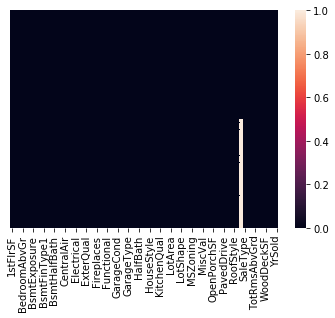

In [16]:
# Displaying the heat map to check for the missing values 
sns.heatmap(overall_set.isnull(),yticklabels = False)

In [17]:
# Creating features from the dataset
overall_set['TotalArea'] = overall_set['TotalBsmtSF'] + overall_set['1stFlrSF'] + overall_set['2ndFlrSF'] + overall_set['GrLivArea'] + overall_set['GarageArea']
overall_set['Bathrooms'] = overall_set['FullBath'] + overall_set['HalfBath']*0.5 
overall_set['Year average']= (overall_set['YearRemodAdd']+overall_set['YearBuilt'])/2

In [18]:
# Correalation of the columns
sub = overall_set.select_dtypes(exclude='object')
sub_corr = sub.corr()

In [19]:
overall_set.shape

(2919, 79)

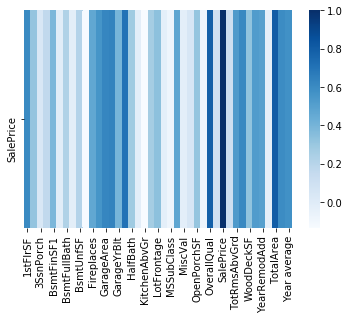

In [20]:
# Heatmap of correlation with target variable Price column
sns.heatmap(sub_corr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')

In [21]:
# Splitting the concatenated dataset to train and test dataset
c_train_set = overall_set[0:1459]

In [22]:
c_train_set = overall_set.iloc[:1460,:]
c_test_set = overall_set.iloc[1460:,:]

In [23]:
c_train_set.shape

(1460, 79)

In [24]:
c_test_set.shape

(1459, 79)

In [ ]:
# Performing analysis on train dataset

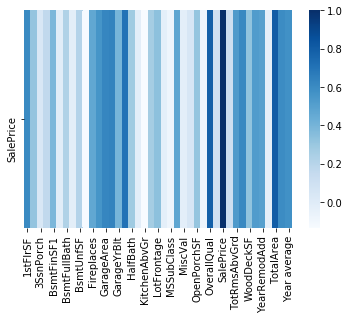

In [25]:
c_train_set_cor = (c_train_set.select_dtypes(exclude='object')).corr()
sns.heatmap(c_train_set_cor.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')

In [26]:
Num=c_train_set_cor

In [214]:
# Correaltion of each column with target varaible Price
Num=c_train_set_cor['SalePrice'].sort_values(ascending=False).to_frame()
Num

,SalePrice
SalePrice,1.000000
TotalArea,0.801018
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
Bathrooms,0.597966
Year average,0.576144


Text(0, 0.5, 'Sale Price')

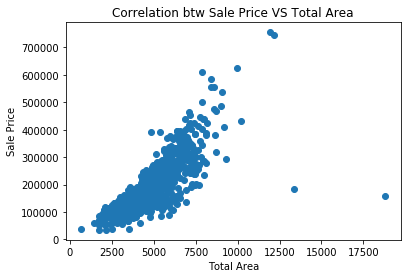

In [28]:
# Correlation btw Sale Price VS Total Area using scatter plot
plt.scatter(c_train_set['TotalArea'],c_train_set['SalePrice'])
plt.title('Correlation btw Sale Price VS Total Area')
plt.xlabel('Total Area')
plt.ylabel('Sale Price')

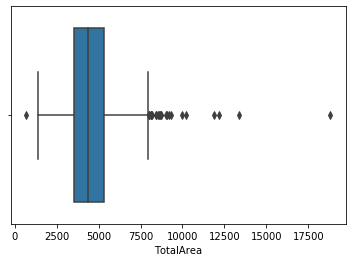

In [29]:
# Box plot to identify outliers in column Total Area
sns.boxplot(c_train_set['TotalArea'])

In [30]:
c_train_set['TotalArea'].describe()

count     1460.000000
mean      4555.492466
std       1433.745228
min        668.000000
25%       3552.000000
50%       4385.500000
75%       5324.500000
max      18812.000000
Name: TotalArea, dtype: float64

In [31]:
std_price = np.std(c_train_set['TotalArea'])
mean_price = np.mean(c_train_set['TotalArea'])
(c_train_set['TotalArea'] > 13* std_price).sum()

1

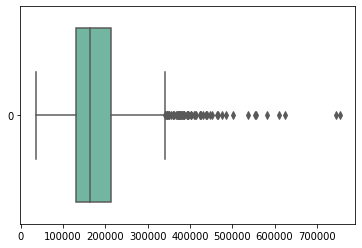

In [154]:
data_boxplot = c_train_set[['SalePrice','TotalArea','OverallQual','Bathrooms']]
sns.boxplot(data=data_boxplot.SalePrice, orient="h", palette="Set2")

In [33]:
data_pairplot = c_train_set[['SalePrice','TotalArea','OverallQual','Bathrooms']]

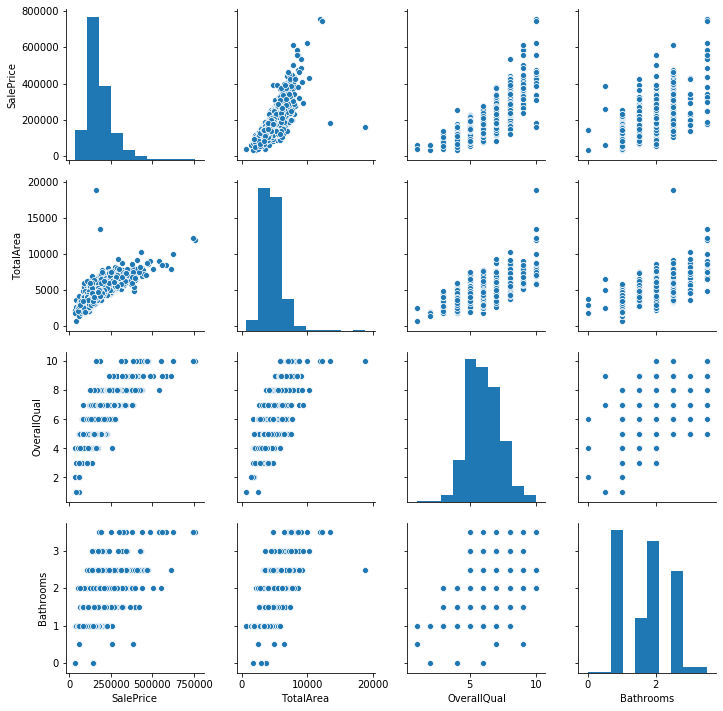

In [34]:
# Plotting pair plot for top 3 high correlated columns with price
sns.pairplot(data_pairplot,kind = 'scatter')

In [122]:
c_train_sp = c_train_set['SalePrice']
c_train_br = c_train_set['Bathrooms']
obs_corr = c_train_sp.corr(c_train_br)

0.5979656210064279

In [148]:
slope_spvsb, intercept_spvsb = np.polyfit(c_train_sp,c_train_br,1)

In [149]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps


In [150]:
bs_slope_reps_spvsb, bs_intercept_reps_spvsb = draw_bs_pairs_linreg(c_train_br,c_train_sp,1000)

In [151]:
np.percentile(bs_intercept_reps_spvsb,(2.5,97.5))

array([38580.32895709, 59265.74793522])

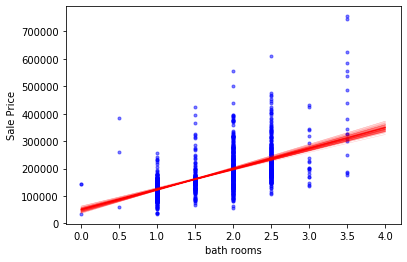

In [153]:
# Make scatter plot of 1975 data
_ = plt.plot(c_train_br,c_train_sp, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('bath rooms')
_ = plt.ylabel('Sale Price')

# Generate x-values for bootstrap lines: x
x = np.array([0, 4])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x,bs_slope_reps_spvsb[i]* x + bs_intercept_reps_spvsb[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

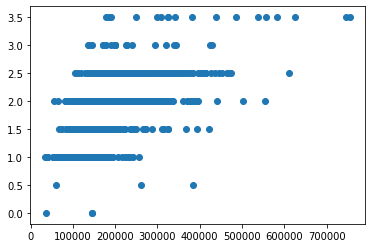

In [147]:
plt.scatter(c_train_set['SalePrice'],c_train_set['Bathrooms'])

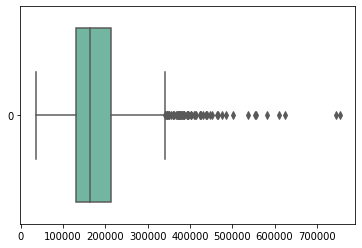

In [155]:
sns.boxplot(data=data_boxplot.SalePrice, orient="h", palette="Set2")

In [ ]:
# Function to remove outliers

In [157]:
def remove_outliers(column, data):
    #lets remove outliers from the sqft_lot15 column
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    upper_index = data[data[column] >=upper].index
    lower_index = data[data[column] <=lower].index
    data = data.drop(upper_index)
    data = data.drop(lower_index)
    return data

In [158]:
# Removing outliers from Sale Price column
data_pairplot = remove_outliers('SalePrice',data_pairplot)

In [160]:
data_pairplot.SalePrice.mean()

170237.12723373837

In [164]:
data_pairplot.shape

(1399, 4)

In [165]:
# Removing outliers from No. of bathrooms column
data_pairplot = remove_outliers('Bathrooms',data_pairplot)
data_pairplot.shape

(1391, 4)

In [167]:
data_pairplot.corr()

,SalePrice,TotalArea,OverallQual,Bathrooms
SalePrice,1.000000,0.770605,0.784453,0.609375
TotalArea,0.770605,1.000000,0.624182,0.632759
OverallQual,0.784453,0.624182,1.000000,0.560344
Bathrooms,0.609375,0.632759,0.560344,1.000000


In [168]:
# Removing outliers from Overall quality and Total Area columns
data_pairplot = remove_outliers('OverallQual',data_pairplot)
data_pairplot = remove_outliers('TotalArea',data_pairplot)

In [170]:
# Calculating the correlation after removing the outliers
data_pairplot.corr()

,SalePrice,TotalArea,OverallQual,Bathrooms
SalePrice,1.000000,0.807186,0.781815,0.601119
TotalArea,0.807186,1.000000,0.621111,0.650448
OverallQual,0.781815,0.621111,1.000000,0.552429
Bathrooms,0.601119,0.650448,0.552429,1.000000


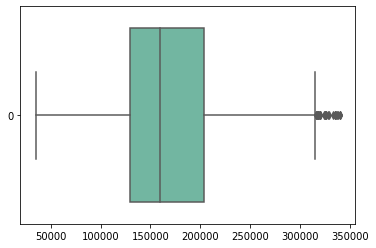

In [162]:
sns.boxplot(data=data_pairplot.SalePrice, orient="h", palette="Set2")

In [171]:
data_pairplot.corr()

,SalePrice,TotalArea,OverallQual,Bathrooms
SalePrice,1.000000,0.807186,0.781815,0.601119
TotalArea,0.807186,1.000000,0.621111,0.650448
OverallQual,0.781815,0.621111,1.000000,0.552429
Bathrooms,0.601119,0.650448,0.552429,1.000000


In [188]:
obs_corr = data_pairplot['SalePrice'].corr(data_pairplot['Bathrooms'])
obs_corr

0.6011193093419799

In [ ]:
# Statistical inference from the dataset

In [211]:
import scipy
from scipy.stats.stats import pearsonr
sp = data_pairplot['SalePrice']
br = data_pairplot['Bathrooms']
pearson_coefficient,p_value = pearsonr(sp,br)
print(pearson_coefficient)
print(p_value)

0.6011193093419802
7.397820264799716e-136


In [ ]:
# As the P value is less than 0.05, we reject the null hypothesis. 
#Thererfore there is significance relationship between Price and No. of Bathrooms.

In [212]:
ta = data_pairplot['TotalArea']
pearson_coefficient,p_value = pearsonr(sp,ta)
print(pearson_coefficient)
print(p_value)

0.8071862950678779
1.2751432e-316


In [ ]:
# As the P value is less than 0.05, we reject the null hypothesis. 
#Thererfore there is significance relationship between Price and Total Area.

In [215]:
oq = data_pairplot['OverallQual']
pearson_coefficient,p_value = pearsonr(sp,oq)
print(pearson_coefficient)
print(p_value)

0.7818153319528443
5.751644068208216e-284


In [ ]:
# As the P value is less than 0.05, we reject the null hypothesis. 
#Thererfore there is significance relationship between Price and Overall quality.

In [218]:
sp = c_train_set['SalePrice']
spr = c_train_set['3SsnPorch']
pearson_coefficient,p_value = pearsonr(sp,spr)
print(pearson_coefficient)
print(p_value)

0.04458366533574841
0.08858170358062883


In [ ]:
# As the P value is greater than 0.05, we accept the null hypothesis. 
# Thererfore there is no significance relationship between Price and 3SsnPorch.

In [230]:
bdrooms_3 = c_train_set[c_train_set['BedroomAbvGr'] > 4]
sp = bdrooms_3['SalePrice']
bedrooms = bdrooms_3['BedroomAbvGr']
pearson_coefficient,p_value = pearsonr(sp,bedrooms)
print(pearson_coefficient)
print(p_value)

-0.10314231423494306
0.5944284218885458
